# Chapter1:Basic Image handling and Processing

### PIL – the Python Imaging Library

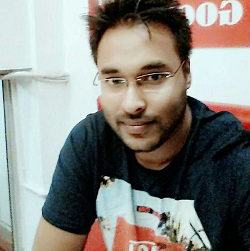

In [8]:
#importing an image
from PIL import Image
pil_im = Image.open('abhi.jpg')
pil_im

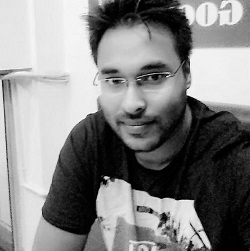

In [2]:
#color conversions
pil_im = Image.open('abhi.jpg').convert('L')#greyscale conversion
pil_im

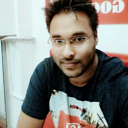

In [4]:
#Create thumbnails(small size of image)
pil_im.thumbnail((128,128))
pil_im

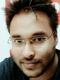

In [5]:
#Cropping an image
box = (40,0,100,80) 
region = pil_im.crop(box)
region

#### The region is deﬁned by a 4-tuple, where coordinates are (left, upper, right, lower). PIL uses a coordinate system with (0,0) in the upper left corner

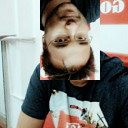

In [6]:
#pasting an inverted cropped image on the same place it was cropped from
region = region.transpose(Image.ROTATE_180) 
pil_im.paste(region,box)
pil_im

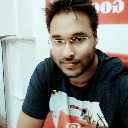

In [9]:
#Resizing an image
out = pil_im.resize((128,128))
out

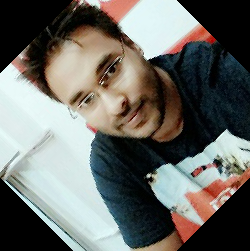

In [10]:
#rotating an image
out = pil_im.rotate(45)#counterclockwise angles
out

### Matplotlib

#### Plotting images, points and lines

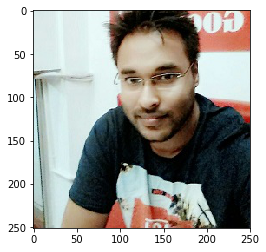

In [12]:
from PIL import Image 
from pylab import *
# read image to array 
im = array(Image.open('abhi.jpg'))
# plot the image 
imshow(im)
show()

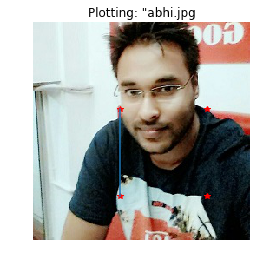

In [13]:
from PIL import Image 
from pylab import *
# read image to array 
im = array(Image.open('abhi.jpg'))
# plot the image 
imshow(im)
# some points 
x = [100,100,200,200] 
y = [200,100,200,100]
# plot the points with red star-markers 
plot(x,y,'r*')
# line plot connecting the first two points 
plot(x[:2],y[:2])
# add title and show the plot 
title('Plotting: "abhi.jpg')
axis('off')#if u dont want the axis
show()

### Image contours and histograms

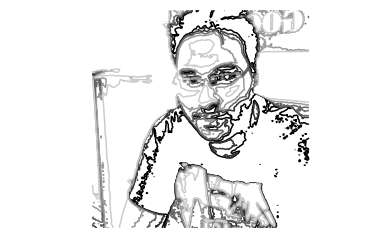

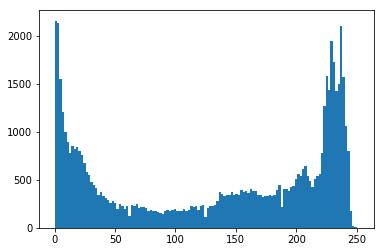

In [14]:
#Contours are an outline representing or bounding the shape or form of something.
#countours need greyscale images because it needs single value for every(x,y) co-ordinate.
from PIL import Image 
from pylab import *
# read image to array 
im = array(Image.open('abhi.jpg').convert('L'))
# create a new figure 
figure() 
# don’t use colors 
gray() 
# show contours with origin upper left corner 
contour(im, origin='image') 
axis('equal') 
axis('off')
figure() 
hist(im.flatten(),128) 
show()

### NumPy

In [15]:
import numpy as np
im = np.array(Image.open('abhi.jpg')) 
print(im.shape, im.dtype)
im = np.array(Image.open('abhi.jpg').convert('L'),dtype=np.float32) 
print (im.shape, im.dtype)

(251, 250, 3) uint8
(251, 250) float32


#### Graylevel transforms

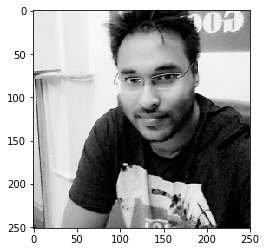

In [16]:
from PIL import Image 
import numpy as np
im = np.array(Image.open('abhi.jpg').convert('L'))
imshow(im)

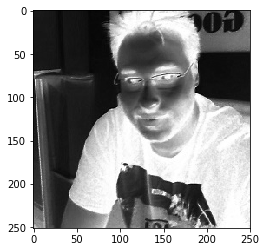

In [17]:
im2 = 255 - im #invert image intensities
imshow(im2)

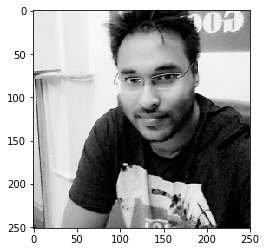

In [18]:
im3 = (100.0/255) * im + 100 #clamp to interval 100...200
imshow(im3)

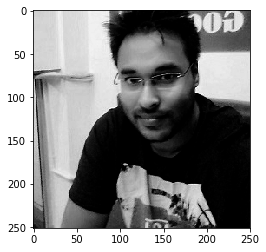

In [19]:
im4 = 255.0 * (im/255.0)**2 #squared function to more darken the dark pixels
imshow(im4)

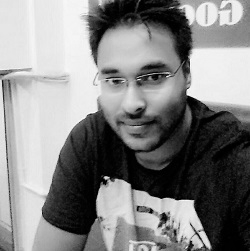

In [20]:
#Thereverseofthe array() transformation can bedone using the PIL function fromarray() 
pil_im = Image.fromarray(im)
pil_im

### Image resizing

In [21]:
#resizing an numpy array
def imresize(im,sz): 
    """ Resize an image array using PIL. """ 
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))

### Histogram equalization

 A very useful example of a graylevel transform is histogram equalization. This transform ﬂattens the graylevel histogram of an image so that all intensities are as equally common as possible. This is often a good way to normalize image intensity before further processing and also a way to increase image contrast. The transform function is in this case a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range)

In [22]:
def histeq(im,nbr_bins=256): 
    """ Histogram equalization of a grayscale image. """
    # get image histogram 
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True) 
    cdf = imhist.cumsum() # cumulative distribution function 
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values 
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

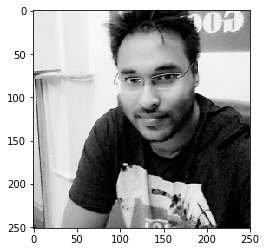

In [23]:
from PIL import Image 
import numpy as np
im = np.array(Image.open('abhi.jpg').convert('L'))
imshow(im)

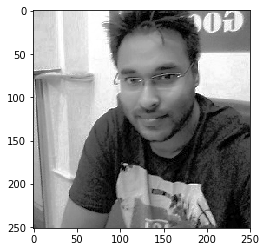

In [24]:
#After histogram equialisation
im2,cdf = histeq(im)
imshow(im2)

### Averaging images

In [25]:
def compute_average(imlist): 
    """ Compute the average of a list of images. """
   # open first image and make into array of type float 
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]: 
        try: 
            averageim += array(Image.open(imname)) 
        except: 
            print (imname + '...skipped') 
            averageim /= len(imlist)
    # return average as uint8 
    return array(averageim, 'uint8')

### Dimensionality reduction using PCA

For this we will be using sckitlearns PCA

### Using the Pickle module

If you want to save some results or data for later use, the pickle module, which comes with Python, is very useful. Pickle can take almost any Python object and convert it to a string representation. This process is called pickling. Reconstructing the object from the string representation is conversely called unpickling. This string representation can then be easily stored or transmitted. 

In [ ]:
# save mean and principal components 
f = open('font_pca_modes.pkl', 'wb') 
pickle.dump(immean,f) 
pickle.dump(V,f) 
f.close()

In [ ]:
# load mean and principal components 
f = open('font_pca_modes.pkl', 'rb') 
immean = pickle.load(f) 
V = pickle.load(f) 
f.close()

# open file and save 
with open('font_pca_modes.pkl', 'wb') as f : 
    pickle.dump(immean,f) 
    pickle.dump(V,f)

In [ ]:
# open file and load 
with open('font_pca_modes.pkl', 'rb') as f : 
    immean = pickle.load(f) 
    V = pickle.load(f)

# SciPy

#### Blurring images

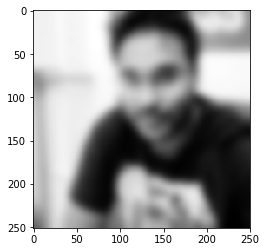

In [31]:
#GAussian blur
from PIL import Image 
from numpy import * 
from scipy.ndimage import filters
im = array(Image.open('abhi.jpg').convert('L')) 
im2 = filters.gaussian_filter(im,5)
imshow(im2)
show()

#### Image derivatives

In [34]:
#pewit filters and sobel filters
from PIL import Image 
from numpy import * 
from scipy.ndimage import filters
im = array(Image.open('abhi.jpg').convert('L'))
#Sobel derivative filters 
imx = zeros(im.shape) 
filters.sobel(im,1,imx)
imy = zeros(im.shape) 
filters.sobel(im,0,imy)
magnitude = sqrt(imx**2+imy**2)

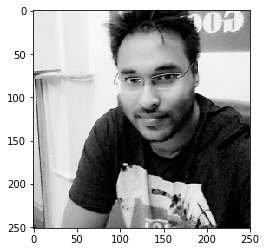

In [35]:
imshow(im)
show()

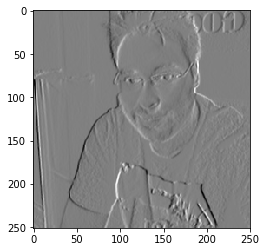

In [36]:
imshow(imx)#x derivative
show()

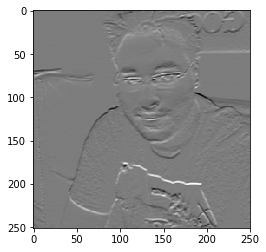

In [37]:
imshow(imy)#y derivative
show()

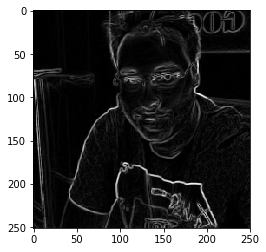

In [38]:
imshow(magnitude)#gradient magnitude
show()

### Saving arrays as images

In [ ]:
import scipy.misc 
scipy.misc.imsave('test.jpg',im)

### Advanced example: Image de-noising

#### Rudin-Osher-Fatemi de-noising model (ROF) 

In [ ]:
#We will be using open cv module.